In [1]:
import pandas as pd
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
import folium
import json
import requests
import geopandas as gpd
%matplotlib inline

### Let's start by loading the Excel spreadsheets into pandas DataFrames. 

In [2]:
data_path = './data'
#act = pd.read_excel(f'{data_path}/ACT.xlsx')
#act_disag = pd.read_excel(f'{data_path}/ACT_DESAGREGADO.xlsx')
#adherence = pd.read_excel(f'{data_path}/Adherencia.xlsx')
#familiar_records = pd.read_excel(f'{data_path}/Antecedentes_familiares.xlsx')
#pathological_records = pd.read_excel(f'{data_path}/Antecedentes_patologicos.xlsx')
#diagnostics_aids = pd.read_excel(f'{data_path}/Ayudas_diagnosticas.xlsx')
#biologics_asthma = pd.read_excel(f'{data_path}/Biologicos Asma.xlsx')
#life_quality = pd.read_excel(f'{data_path}/Calidad de vida relacioada en salud.xlsx')
basic_info = pd.read_excel(f'{data_path}/Datos basicos.xlsx')
#dyspnea = pd.read_excel(f'{data_path}/Disnea.xlsx')
#ram_pharmacovigilance = pd.read_excel(f'{data_path}/Farmacovigilancia RAM.xlsx')
#habits = pd.read_excel(f'{data_path}/Habitos.xlsx')
#hospitalizations = pd.read_excel(f'{data_path}/Hospitalizaciones.xlsx')
#collecting_issues = pd.read_excel(f'{data_path}/Incosistencias en reclamacion.xlsx')
#medicines = pd.read_excel(f'{data_path}/Medicamentos.xlsx')
#height_weight = pd.read_excel(f'{data_path}/Mediciones de peso y talla.xlsx')
#emergencies = pd.read_excel(f'{data_path}/Urgencias.xlsx')
#vaccines = pd.read_excel(f'{data_path}/Vacunacion.xlsx')

### Basic personal data

In [3]:
basic_info.head()

,ID,edad,genero,escolaridad,EstadoCivil,Preferencia,Departamento,Ciudad,Estrato,Zona,AcompaÃ±ante,NivelSocioEconomico,Ocupacion,Regimen,TipoAfiliacion,RelacionLaboral,FE_NACIMIENTO
0,500547,58.0,M,SECUNDARIA,CASADO (A),HETEROSEXUAL,ANTIOQUIA,MEDELLIN,3.0,URBANA,PACIENTE,A,EMPLEADO,CONTRIBUTIVO,COTIZANTE,EMPLEADO,1962-05-19 00:00:00
1,500588,15.0,M,PRIMARIA,SOLTERO (A),NaN,CUNDINAMARCA,BOGOTA,2.0,URBANA,MADRE,B,ESTUDIANTE,CONTRIBUTIVO,BENEFICIARIO,MENOR NO LABORA,2004-12-19 00:00:00
2,502989,29.0,M,UNIVERSITARIO,SOLTERO (A),HETEROSEXUAL,ANTIOQUIA,MEDELLIN,3.0,URBANA,MADRE,A,SIN DEFINIR,CONTRIBUTIVO,BENEFICIARIO,SIN EMPLEO,1990-08-22 00:00:00
3,506808,11.0,M,EDAD PREESCOLAR,SOLTERO (A),HETEROSEXUAL,ANTIOQUIA,BELLO,1.0,URBANA,MADRE,A,ESTUDIANTE,CONTRIBUTIVO,BENEFICIARIO,MENOR NO LABORA,2008-10-06 00:00:00
4,512938,22.0,F,SECUNDARIA,SOLTERO (A),HETEROSEXUAL,ANTIOQUIA,MEDELLIN,3.0,URBANA,PACIENTE,A,EMPLEADO,CONTRIBUTIVO,COTIZANTE,EMPLEADO,1997-10-15 00:00:00


In [4]:
#basic_info.columns = ['id_paciente', 'edad', 'genero', 'escolaridad', 'estado_civil', 'preferecncia_sexual', 'departamento', 'ciudad', 'estrato_social', 'zona', 'acompanante', 'nivel_socioeconomico', 'ocupacion', 'regimen', 'tipo_afiliacion', 'relacion_laboral', 'fecha_nacimiento']
basic_info.columns = [col.lower() for col in basic_info.columns]
basic_info.rename(columns={
    'id': 'id_patient',
    'estadocivil': 'civil_status',
    'genero': 'gender',
    'edad': 'age',
    'escolaridad': 'education',
    'departamento':'department',
    'ciudad': 'city',
    'preferencia': 'sexual_orientation',
    'estrato': 'social_stratum',
    'acompaã±ante': 'companion',
    'nivelsocioeconomico': 'socioeconomic_level',
    'zona': 'zone',
    'ocupacion': 'occupation',
    'regimen': 'social_security_regime',
    'tipoafiliacion': 'social_security_affiliation_type',
    'relacionlaboral': 'employment_type',
    'fe_nacimiento': 'birthdate'    
}, inplace=True)
basic_info.head()
basic_info.shape

(888, 17)

In [5]:
basic_info['social_security_regime'].unique()

array(['CONTRIBUTIVO', 'SUBSIDIADO', nan, 'PARTICULAR', 'OTRO'], dtype=object)

In [6]:
basic_info['gender'] = basic_info['gender'].astype('category')
basic_info['education'] = basic_info['education'].astype('category')
basic_info['education'].cat.reorder_categories(['ANALFABETA', 'EDAD PREESCOLAR', 'PRIMARIA', \
                                                  'SECUNDARIA', 'TECNICO', 'TECNOLOGO', 'UNIVERSITARIO', \
                                                  'POSGRADO'], ordered=True, inplace=True)
basic_info['civil_status'] = basic_info['civil_status'].astype('category')
basic_info['sexual_orientation'] = basic_info['sexual_orientation'].astype('category')
basic_info['zone'] = basic_info['zone'].astype('category')
basic_info['socioeconomic_level'] = basic_info['socioeconomic_level'].astype('category')
basic_info['socioeconomic_level'].cat.reorder_categories(['NIVEL 0 DEL SISBEN', 'NIVEL 1 DEL SISBEN', \
                                                           'NIVEL 2 DEL SISBEN', 'A', 'B', 'C'], \
                                                          ordered=True, inplace=True)
basic_info['occupation'] = basic_info['occupation'].astype('category')
basic_info['social_security_regime'] = basic_info['social_security_regime'].astype('category')
basic_info['social_security_affiliation_type'] = basic_info['social_security_affiliation_type'].astype('category')
basic_info['employment_type'] = basic_info['employment_type'].astype('category')
basic_info['birthdate'] = pd.to_datetime(basic_info['birthdate'])

In [7]:
basic_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 888 entries, 0 to 887
Data columns (total 17 columns):
id_patient                          888 non-null int64
age                                 887 non-null float64
gender                              886 non-null category
education                           877 non-null category
civil_status                        878 non-null category
sexual_orientation                  202 non-null category
department                          886 non-null object
city                                886 non-null object
social_stratum                      887 non-null float64
zone                                887 non-null category
companion                           861 non-null object
socioeconomic_level                 871 non-null category
occupation                          861 non-null category
social_security_regime              861 non-null category
social_security_affiliation_type    861 non-null category
employment_type                     

In [8]:
basic_info.describe(include='all')

,id_patient,age,gender,education,civil_status,sexual_orientation,department,city,social_stratum,zone,companion,socioeconomic_level,occupation,social_security_regime,social_security_affiliation_type,employment_type,birthdate
count,8.880000e+02,887.000000,886,877,878,202,886,886,887.000000,887,861,871,861,861,861,861,887
unique,NaN,NaN,2,8,6,3,12,52,NaN,2,10,6,8,4,3,5,859
top,NaN,NaN,F,SECUNDARIA,SOLTERO (A),HETEROSEXUAL,ANTIOQUIA,MEDELLIN,NaN,URBANA,PACIENTE,A,EMPLEADO,CONTRIBUTIVO,COTIZANTE,EMPLEADO,2004-05-12 00:00:00
freq,NaN,NaN,617,390,420,192,703,470,NaN,853,531,637,463,837,536,477,3
first,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1932-04-05 00:00:00
last,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014-11-04 00:00:00
mean,1.259328e+06,40.839910,NaN,NaN,NaN,NaN,NaN,NaN,2.985344,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,4.326579e+05,18.356553,NaN,NaN,NaN,NaN,NaN,NaN,0.867529,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,5.005470e+05,5.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,8.900988e+05,27.000000,NaN,NaN,NaN,NaN,NaN,NaN,3.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
basic_info.drop_duplicates(inplace=True)

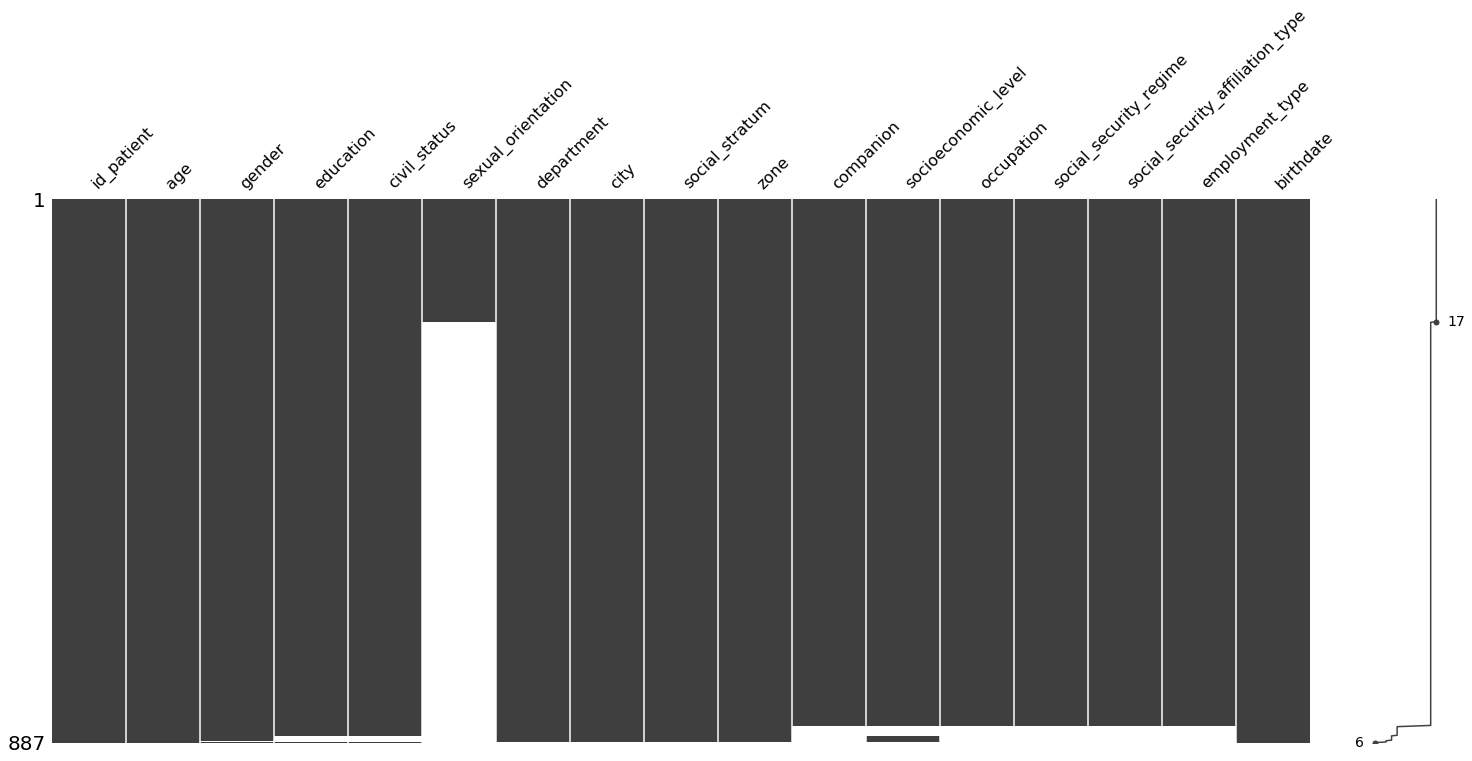

In [10]:
msno.matrix(msno.nullity_sort(basic_info, sort='descending'))

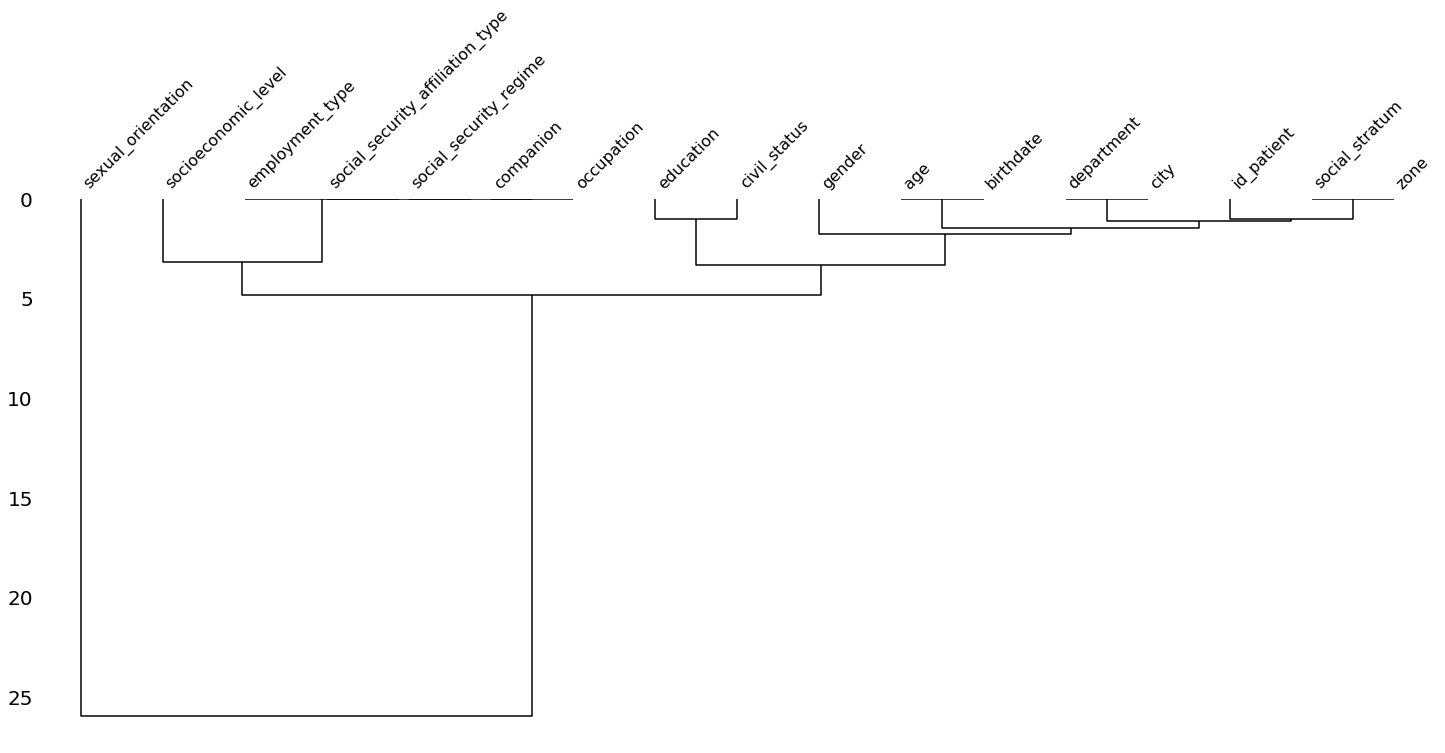

In [11]:
msno.dendrogram(basic_info)

In [12]:
basic_info.groupby('gender').count()

,id_patient,age,education,civil_status,sexual_orientation,department,city,social_stratum,zone,companion,socioeconomic_level,occupation,social_security_regime,social_security_affiliation_type,employment_type,birthdate
gender,,,,,,,,,,,,,,,,
F,616,615,609,610,145,614,614,615,615,599,605,599,599,599,599,615
M,269,269,267,267,56,269,269,269,269,261,263,261,261,261,261,269


In [13]:
basic_info.groupby('zone').count()

,id_patient,age,gender,education,civil_status,sexual_orientation,department,city,social_stratum,companion,socioeconomic_level,occupation,social_security_regime,social_security_affiliation_type,employment_type,birthdate
zone,,,,,,,,,,,,,,,,
RURAL,34,34,34,34,34,8,34,34,34,33,33,33,33,33,33,34
URBANA,852,851,850,841,842,193,851,851,852,827,837,827,827,827,827,851


/opt/conda/lib/python3.6/site-packages/pandas/plotting/_core.py:2396: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  yrot=yrot, **kwds)


[Text(0.5,0,'Age')]

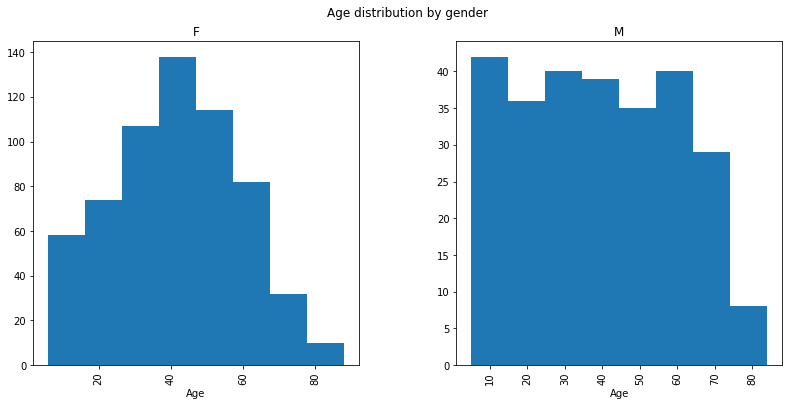

In [14]:
fig, ax = plt.subplots(figsize=(13,6))
chart_axes = basic_info[['age','gender']].hist(by='gender', bins=8, ax=ax)
fig.suptitle("Age distribution by gender")
chart_axes[0].set(xlabel="Age")
chart_axes[1].set(xlabel="Age")

Text(0.5,0,'Social stratum classification')

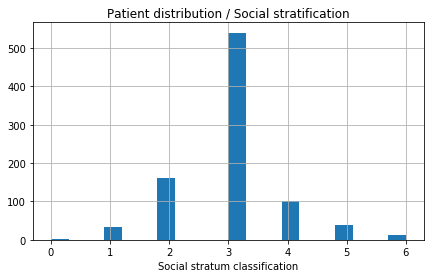

In [15]:
plt.figure(figsize=(7,4))
basic_info['social_stratum'].hist(bins=20)
plt.title("Patient distribution / Social stratification")
plt.xlabel("Social stratum classification")

In [16]:
count_per_mpio = basic_info[['id_patient', 'city']].groupby('city').count().reset_index()
count_per_mpio.head()

,city,id_patient
0,ANDES,1
1,ANTIOQUIA,5
2,ARMENIA,4
3,BARBOSA,1
4,BARRANQUILLA,48


In [16]:
basic_info.loc[basic_info['city']=='BOGOTA', 'department'] = 'SANTAFE DE BOGOTA D.C'

In [18]:
basic_info.loc[basic_info['department']=='MEDELLIN', 'department'] = 'ANTIOQUIA' # MEDELLIN -> ANTIOQUIA
basic_info.loc[basic_info['department']=='PEREIRA', 'department'] = 'RISARALDA' # PEREIRA -> RISARALDA
basic_info.loc[basic_info['department']=='VALLE', 'department'] = 'VALLE DEL CAUCA' # VALLE -> VALLE DEL CAUCA

count_per_depto = basic_info[['id_patient', 'department']].groupby('department').count().reset_index()
count_per_depto.columns = ['department', 'count_patients']
count_per_depto['percentage'] = (count_per_depto['count_patients'] / sum(count_per_depto['count_patients']))*100
count_per_depto.sort_values(by='count_patients', ascending=False).set_index('department')

,count_patients,percentage
department,,
ANTIOQUIA,709,80.112994
ATLANTICO,53,5.988701
CUNDINAMARCA,40,4.519774
VALLE DEL CAUCA,36,4.067797
CALDAS,28,3.163842
RISARALDA,11,1.242938
QUINDIO,4,0.451977
BOLIVAR,2,0.225989
ARMENIA QUINDIO,1,0.112994


In [19]:
mpios_colombia_url = 'https://raw.githubusercontent.com/santiblanko/colombia.geojson/master/mpio.json'
deptos_colombia_url = 'https://raw.githubusercontent.com/santiblanko/colombia.geojson/master/depto.json'
coords = [7.1986, -75.3412]

In [20]:
deptos_gdf = gpd.read_file(deptos_colombia_url)
deptos_gdf.head()

,DPTO,NOMBRE_DPT,AREA,PERIMETER,HECTARES,geometry
0,05,ANTIOQUIA,6.335186e+10,1963728.843,6335185.555,POLYGON ((-76.30393314122961 8.616514809855945...
1,08,ATLANTICO,3.360765e+09,240936.172,336076.535,POLYGON ((-74.86716728669083 10.35842774071002...
2,11,SANTAFE DE BOGOTA D.C,1.650948e+09,323322.540,165094.778,POLYGON ((-74.01948861243253 4.792254432176655...
3,13,BOLIVAR,2.614189e+10,1309427.968,2614189.453,"POLYGON ((-75.15607875564588 10.420831662843, ..."
4,15,BOYACA,2.335258e+10,1364539.911,2335258.246,"POLYGON ((-72.2095112233977 7.024662781962941,..."


In [21]:
merge_count_deptos = deptos_gdf.merge(count_per_depto, how='left', left_on='NOMBRE_DPT', right_on='department')

In [22]:
m = folium.Map(
    location=coords,
    tiles='CartoDB positron',
    zoom_start=7  # Limited levels of zoom for free Mapbox tiles.
)

tooltip = folium.GeoJsonTooltip(
    fields=["NOMBRE_DPT", "count_patients"],
    aliases=["Departamento:", "Número pacientes:"],
    localize=True,
    sticky=False,
    labels=True,
    style="""
        background-color: #F0EFEF;
        border: 2px solid black;
        border-radius: 3px;
        box-shadow: 3px;
    """,
    max_width=800,
)


# choropleth = folium.Choropleth(
#     geo_data=mpios_colombia_url,
#     name='choropleth',
#     data=count_per_mpio,
#     columns=['Ciudad', 'ID'],
#     key_on='feature.properties.NOMBRE_MPI',
#     nan_fill_color='white',
#     nan_fill_opacity=0.7,
#     fill_color='YlGn',
#     fill_opacity=0.9,
#     line_opacity=0.2,
#     highlight=True,
#     tooltip=tooltip,
#     legend_name='Count'
# ).add_to(m)

choropleth = folium.Choropleth(
    geo_data=merge_count_deptos,
    name='choropleth',
    data=count_per_depto,
    columns=['department', 'count_patients'],
    key_on='feature.properties.NOMBRE_DPT',
    nan_fill_color='white',
    nan_fill_opacity=0.7,
    fill_color='YlGn',
    fill_opacity=0.9,
    line_opacity=0.2,
    highlight=True,
    legend_name='Patient count per Department'
).add_to(m)

choropleth.geojson.add_child(
    tooltip
)

m

### Records with duplicate IDs 

In [23]:
duplicate_ids = basic_info[basic_info.duplicated('id_patient')]['id_patient']

In [24]:
for i in duplicate_ids:
    print(f'\nDuplicate rows for id_patient {i}:')
    display(basic_info[basic_info['id_patient'] == i])


Duplicate rows for id_patient 715534:


,id_patient,age,gender,education,civil_status,sexual_orientation,department,city,social_stratum,zone,companion,socioeconomic_level,occupation,social_security_regime,social_security_affiliation_type,employment_type,birthdate
124,715534,NaN,F,NaN,SIN DEFINIR,NaN,ANTIOQUIA,MARINILLA,3.0,URBANA,MADRE,A,ESTUDIANTE,CONTRIBUTIVO,BENEFICIARIO,SIN EMPLEO,NaT
125,715534,19.0,F,SECUNDARIA,SOLTERO (A),NaN,ANTIOQUIA,MARINILLA,3.0,URBANA,NaN,NaN,NaN,NaN,NaN,NaN,2000-12-11



Duplicate rows for id_patient 814670:


,id_patient,age,gender,education,civil_status,sexual_orientation,department,city,social_stratum,zone,companion,socioeconomic_level,occupation,social_security_regime,social_security_affiliation_type,employment_type,birthdate
179,814670,20.0,F,SECUNDARIA,SOLTERO (A),NaN,ANTIOQUIA,MEDELLIN,3.0,URBANA,PACIENTE,A,EMPLEADO,CONTRIBUTIVO,COTIZANTE,EMPLEADO,2000-02-10
180,814670,20.0,F,PRIMARIA,SOLTERO (A),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2000-02-21



Duplicate rows for id_patient 960030:


,id_patient,age,gender,education,civil_status,sexual_orientation,department,city,social_stratum,zone,companion,socioeconomic_level,occupation,social_security_regime,social_security_affiliation_type,employment_type,birthdate
264,960030,18.0,M,PRIMARIA,SOLTERO (A),NaN,ANTIOQUIA,MEDELLIN,1.0,URBANA,MADRE,A,ESTUDIANTE,CONTRIBUTIVO,BENEFICIARIO,INDEPENDIENTE,2001-11-02
265,960030,18.0,M,SECUNDARIA,SOLTERO (A),NaN,ANTIOQUIA,MEDELLIN,3.0,URBANA,PACIENTE,A,ESTUDIANTE,CONTRIBUTIVO,BENEFICIARIO,MENOR NO LABORA,2001-11-02



Duplicate rows for id_patient 1008837:


,id_patient,age,gender,education,civil_status,sexual_orientation,department,city,social_stratum,zone,companion,socioeconomic_level,occupation,social_security_regime,social_security_affiliation_type,employment_type,birthdate
294,1008837,16.0,F,PRIMARIA,SOLTERO (A),HETEROSEXUAL,ANTIOQUIA,MEDELLIN,3.0,URBANA,PACIENTE,A,INDEPENDIENTE,CONTRIBUTIVO,BENEFICIARIO,SIN EMPLEO,2004-05-12
295,1008837,16.0,F,PRIMARIA,SOLTERO (A),NaN,ANTIOQUIA,MEDELLIN,3.0,URBANA,FAMILIAR CERCANO,C,ESTUDIANTE,CONTRIBUTIVO,BENEFICIARIO,MENOR NO LABORA,2004-05-12
296,1008837,16.0,F,PRIMARIA,SOLTERO (A),NaN,NaN,NaN,3.0,URBANA,NaN,NaN,NaN,NaN,NaN,NaN,2004-05-12



Duplicate rows for id_patient 1008837:


,id_patient,age,gender,education,civil_status,sexual_orientation,department,city,social_stratum,zone,companion,socioeconomic_level,occupation,social_security_regime,social_security_affiliation_type,employment_type,birthdate
294,1008837,16.0,F,PRIMARIA,SOLTERO (A),HETEROSEXUAL,ANTIOQUIA,MEDELLIN,3.0,URBANA,PACIENTE,A,INDEPENDIENTE,CONTRIBUTIVO,BENEFICIARIO,SIN EMPLEO,2004-05-12
295,1008837,16.0,F,PRIMARIA,SOLTERO (A),NaN,ANTIOQUIA,MEDELLIN,3.0,URBANA,FAMILIAR CERCANO,C,ESTUDIANTE,CONTRIBUTIVO,BENEFICIARIO,MENOR NO LABORA,2004-05-12
296,1008837,16.0,F,PRIMARIA,SOLTERO (A),NaN,NaN,NaN,3.0,URBANA,NaN,NaN,NaN,NaN,NaN,NaN,2004-05-12



Duplicate rows for id_patient 1022147:


,id_patient,age,gender,education,civil_status,sexual_orientation,department,city,social_stratum,zone,companion,socioeconomic_level,occupation,social_security_regime,social_security_affiliation_type,employment_type,birthdate
304,1022147,10.0,F,EDAD PREESCOLAR,SOLTERO (A),NaN,ANTIOQUIA,MEDELLIN,3.0,URBANA,MADRE,A,SIN DEFINIR,CONTRIBUTIVO,BENEFICIARIO,MENOR NO LABORA,2009-06-08
305,1022147,10.0,F,PRIMARIA,SOLTERO (A),NaN,ANTIOQUIA,COPACABANA,3.0,URBANA,MADRE,A,ESTUDIANTE,CONTRIBUTIVO,BENEFICIARIO,MENOR NO LABORA,2009-06-08



Duplicate rows for id_patient 1053118:


,id_patient,age,gender,education,civil_status,sexual_orientation,department,city,social_stratum,zone,companion,socioeconomic_level,occupation,social_security_regime,social_security_affiliation_type,employment_type,birthdate
325,1053118,19.0,F,SECUNDARIA,SOLTERO (A),HETEROSEXUAL,ANTIOQUIA,LA ESTRELLA,3.0,URBANA,FAMILIAR CERCANO,A,SIN DEFINIR,CONTRIBUTIVO,BENEFICIARIO,SIN EMPLEO,2000-12-07
326,1053118,19.0,F,SECUNDARIA,SOLTERO (A),NaN,ANTIOQUIA,ITAGUI,2.0,URBANA,HERMANO(A),A,ESTUDIANTE,CONTRIBUTIVO,BENEFICIARIO,SIN EMPLEO,2000-12-07



Duplicate rows for id_patient 1118363:


,id_patient,age,gender,education,civil_status,sexual_orientation,department,city,social_stratum,zone,companion,socioeconomic_level,occupation,social_security_regime,social_security_affiliation_type,employment_type,birthdate
367,1118363,6.0,M,ANALFABETA,SOLTERO (A),HETEROSEXUAL,ANTIOQUIA,MEDELLIN,3.0,URBANA,FAMILIAR CERCANO,B,SIN DEFINIR,CONTRIBUTIVO,BENEFICIARIO,MENOR NO LABORA,2013-10-28
368,1118363,6.0,M,PRIMARIA,SOLTERO (A),NaN,ANTIOQUIA,MEDELLIN,2.0,RURAL,NaN,NaN,NaN,NaN,NaN,NaN,2013-10-28



Duplicate rows for id_patient 1226479:


,id_patient,age,gender,education,civil_status,sexual_orientation,department,city,social_stratum,zone,companion,socioeconomic_level,occupation,social_security_regime,social_security_affiliation_type,employment_type,birthdate
424,1226479,21.0,F,SECUNDARIA,SOLTERO (A),HETEROSEXUAL,ANTIOQUIA,MEDELLIN,5.0,URBANA,PADRE,C,ESTUDIANTE,CONTRIBUTIVO,BENEFICIARIO,MENOR NO LABORA,1998-11-22
425,1226479,21.0,F,SECUNDARIA,SOLTERO (A),NaN,ANTIOQUIA,MEDELLIN,5.0,URBANA,PACIENTE,B,ESTUDIANTE,CONTRIBUTIVO,BENEFICIARIO,SIN EMPLEO,1998-11-22



Duplicate rows for id_patient 1269267:


,id_patient,age,gender,education,civil_status,sexual_orientation,department,city,social_stratum,zone,companion,socioeconomic_level,occupation,social_security_regime,social_security_affiliation_type,employment_type,birthdate
449,1269267,30.0,M,PRIMARIA,UNIÓN LIBRE,HETEROSEXUAL,ANTIOQUIA,MEDELLIN,3.0,URBANA,PACIENTE,A,SIN DEFINIR,CONTRIBUTIVO,COTIZANTE,EMPLEADO,1989-08-20
450,1269267,30.0,M,SECUNDARIA,SOLTERO (A),HETEROSEXUAL,ANTIOQUIA,MEDELLIN,2.0,URBANA,PACIENTE,A,EMPLEADO,CONTRIBUTIVO,COTIZANTE,EMPLEADO,1989-08-20



Duplicate rows for id_patient 1515210:


,id_patient,age,gender,education,civil_status,sexual_orientation,department,city,social_stratum,zone,companion,socioeconomic_level,occupation,social_security_regime,social_security_affiliation_type,employment_type,birthdate
593,1515210,14.0,F,SECUNDARIA,SOLTERO (A),HETEROSEXUAL,ATLANTICO,BARRANQUILLA,3.0,URBANA,MADRE,A,ESTUDIANTE,CONTRIBUTIVO,BENEFICIARIO,MENOR NO LABORA,2005-09-05
594,1515210,14.0,F,SECUNDARIA,SOLTERO (A),NaN,ATLANTICO,BARRANQUILLA,2.0,URBANA,MADRE,A,ESTUDIANTE,CONTRIBUTIVO,BENEFICIARIO,MENOR NO LABORA,2005-09-05



Duplicate rows for id_patient 1571540:


,id_patient,age,gender,education,civil_status,sexual_orientation,department,city,social_stratum,zone,companion,socioeconomic_level,occupation,social_security_regime,social_security_affiliation_type,employment_type,birthdate
618,1571540,30.0,F,SECUNDARIA,CASADO (A),HETEROSEXUAL,BOLIVAR,CARTAGENA,2.0,URBANA,SIN DEFINIR,A,EMPLEADO,CONTRIBUTIVO,COTIZANTE,EMPLEADO,1989-06-29
619,1571540,30.0,F,TECNICO,CASADO (A),HETEROSEXUAL,BOLIVAR,CARTAGENA,2.0,URBANA,SIN DEFINIR,A,EMPLEADO,CONTRIBUTIVO,COTIZANTE,EMPLEADO,1989-06-29



Duplicate rows for id_patient 1625263:


,id_patient,age,gender,education,civil_status,sexual_orientation,department,city,social_stratum,zone,companion,socioeconomic_level,occupation,social_security_regime,social_security_affiliation_type,employment_type,birthdate
652,1625263,9.0,F,PRIMARIA,SOLTERO (A),NaN,ANTIOQUIA,BELLO,3.0,URBANA,MADRE,A,ESTUDIANTE,CONTRIBUTIVO,BENEFICIARIO,MENOR NO LABORA,2011-02-27
653,1625263,9.0,F,PRIMARIA,SOLTERO (A),NaN,ANTIOQUIA,BELLO,3.0,URBANA,NaN,NaN,NaN,NaN,NaN,NaN,2011-02-27



Duplicate rows for id_patient 1725068:


,id_patient,age,gender,education,civil_status,sexual_orientation,department,city,social_stratum,zone,companion,socioeconomic_level,occupation,social_security_regime,social_security_affiliation_type,employment_type,birthdate
720,1725068,9.0,F,EDAD PREESCOLAR,SOLTERO (A),NaN,ANTIOQUIA,MEDELLIN,3.0,URBANA,MADRE,A,ESTUDIANTE,CONTRIBUTIVO,BENEFICIARIO,MENOR NO LABORA,2011-01-04
721,1725068,9.0,F,SECUNDARIA,SOLTERO (A),NaN,ANTIOQUIA,MEDELLIN,5.0,URBANA,MADRE,A,ESTUDIANTE,CONTRIBUTIVO,BENEFICIARIO,MENOR NO LABORA,2011-01-04



Duplicate rows for id_patient 1750189:


,id_patient,age,gender,education,civil_status,sexual_orientation,department,city,social_stratum,zone,companion,socioeconomic_level,occupation,social_security_regime,social_security_affiliation_type,employment_type,birthdate
745,1750189,61.0,F,UNIVERSITARIO,CASADO (A),NaN,ATLANTICO,BARRANQUILLA,4.0,URBANA,PACIENTE,C,INDEPENDIENTE,CONTRIBUTIVO,BENEFICIARIO,INDEPENDIENTE,1959-02-21
746,1750189,61.0,F,UNIVERSITARIO,CASADO (A),NaN,ATLANTICO,BARRANQUILLA,4.0,URBANA,PACIENTE,A,EMPLEADO,CONTRIBUTIVO,COTIZANTE,EMPLEADO,1959-02-21


There are records with duplicate ID but different values for the remaining fields:

* Some have complementary information (`R1.x = NaN` while `R1'.x = value`).
* Some have conflicting information (`R1.x = value1` while `R1'.x = value2`).

The strategy for combining duplicate rows is as follow:

* Replace `NaN` occurrences with actual values when available.
* In case of conflicting values pick the first value

In [25]:
def combine_df_rows(duplicate_rows_df):
    comb_df = pd.DataFrame(columns=duplicate_rows_df.columns)
    comb_row = {}
    for col in duplicate_rows_df.columns:
        non_null = duplicate_rows_df[duplicate_rows_df[col].notna()]
        #display(non_null)
        if non_null.shape[0] > 0:
            comb_row[col] = non_null.iloc[0][col]
    comb_df = comb_df.append(comb_row, ignore_index=True)
    return comb_df

#combine_df_rows(basic_info.iloc[[294,295,296]])

In [26]:
for i in duplicate_ids:
    #print(f'\nDuplicate rows for id_paciente {i}:')
    duplicate_rows_df = basic_info[basic_info['id_patient'] == i]
    fixed_row = combine_df_rows(duplicate_rows_df)
    basic_info.iloc[duplicate_rows_df.index[0], :] = fixed_row.iloc[0]

In [27]:
for i in duplicate_ids:
    print(f'\nDuplicate rows for id_patient {i}:')
    display(basic_info[basic_info['id_patient'] == i])


Duplicate rows for id_patient 715534:


,id_patient,age,gender,education,civil_status,sexual_orientation,department,city,social_stratum,zone,companion,socioeconomic_level,occupation,social_security_regime,social_security_affiliation_type,employment_type,birthdate
124,715534,19.0,F,SECUNDARIA,SIN DEFINIR,NaN,ANTIOQUIA,MARINILLA,3.0,URBANA,MADRE,A,ESTUDIANTE,CONTRIBUTIVO,BENEFICIARIO,SIN EMPLEO,2000-12-11
125,715534,19.0,F,SECUNDARIA,SOLTERO (A),NaN,ANTIOQUIA,MARINILLA,3.0,URBANA,NaN,NaN,NaN,NaN,NaN,NaN,2000-12-11



Duplicate rows for id_patient 814670:


,id_patient,age,gender,education,civil_status,sexual_orientation,department,city,social_stratum,zone,companion,socioeconomic_level,occupation,social_security_regime,social_security_affiliation_type,employment_type,birthdate
179,814670,20.0,F,SECUNDARIA,SOLTERO (A),NaN,ANTIOQUIA,MEDELLIN,3.0,URBANA,PACIENTE,A,EMPLEADO,CONTRIBUTIVO,COTIZANTE,EMPLEADO,2000-02-10
180,814670,20.0,F,PRIMARIA,SOLTERO (A),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2000-02-21



Duplicate rows for id_patient 960030:


,id_patient,age,gender,education,civil_status,sexual_orientation,department,city,social_stratum,zone,companion,socioeconomic_level,occupation,social_security_regime,social_security_affiliation_type,employment_type,birthdate
264,960030,18.0,M,PRIMARIA,SOLTERO (A),NaN,ANTIOQUIA,MEDELLIN,1.0,URBANA,MADRE,A,ESTUDIANTE,CONTRIBUTIVO,BENEFICIARIO,INDEPENDIENTE,2001-11-02
265,960030,18.0,M,SECUNDARIA,SOLTERO (A),NaN,ANTIOQUIA,MEDELLIN,3.0,URBANA,PACIENTE,A,ESTUDIANTE,CONTRIBUTIVO,BENEFICIARIO,MENOR NO LABORA,2001-11-02



Duplicate rows for id_patient 1008837:


,id_patient,age,gender,education,civil_status,sexual_orientation,department,city,social_stratum,zone,companion,socioeconomic_level,occupation,social_security_regime,social_security_affiliation_type,employment_type,birthdate
294,1008837,16.0,F,PRIMARIA,SOLTERO (A),HETEROSEXUAL,ANTIOQUIA,MEDELLIN,3.0,URBANA,PACIENTE,A,INDEPENDIENTE,CONTRIBUTIVO,BENEFICIARIO,SIN EMPLEO,2004-05-12
295,1008837,16.0,F,PRIMARIA,SOLTERO (A),NaN,ANTIOQUIA,MEDELLIN,3.0,URBANA,FAMILIAR CERCANO,C,ESTUDIANTE,CONTRIBUTIVO,BENEFICIARIO,MENOR NO LABORA,2004-05-12
296,1008837,16.0,F,PRIMARIA,SOLTERO (A),NaN,NaN,NaN,3.0,URBANA,NaN,NaN,NaN,NaN,NaN,NaN,2004-05-12



Duplicate rows for id_patient 1008837:


,id_patient,age,gender,education,civil_status,sexual_orientation,department,city,social_stratum,zone,companion,socioeconomic_level,occupation,social_security_regime,social_security_affiliation_type,employment_type,birthdate
294,1008837,16.0,F,PRIMARIA,SOLTERO (A),HETEROSEXUAL,ANTIOQUIA,MEDELLIN,3.0,URBANA,PACIENTE,A,INDEPENDIENTE,CONTRIBUTIVO,BENEFICIARIO,SIN EMPLEO,2004-05-12
295,1008837,16.0,F,PRIMARIA,SOLTERO (A),NaN,ANTIOQUIA,MEDELLIN,3.0,URBANA,FAMILIAR CERCANO,C,ESTUDIANTE,CONTRIBUTIVO,BENEFICIARIO,MENOR NO LABORA,2004-05-12
296,1008837,16.0,F,PRIMARIA,SOLTERO (A),NaN,NaN,NaN,3.0,URBANA,NaN,NaN,NaN,NaN,NaN,NaN,2004-05-12



Duplicate rows for id_patient 1022147:


,id_patient,age,gender,education,civil_status,sexual_orientation,department,city,social_stratum,zone,companion,socioeconomic_level,occupation,social_security_regime,social_security_affiliation_type,employment_type,birthdate
304,1022147,10.0,F,EDAD PREESCOLAR,SOLTERO (A),NaN,ANTIOQUIA,MEDELLIN,3.0,URBANA,MADRE,A,SIN DEFINIR,CONTRIBUTIVO,BENEFICIARIO,MENOR NO LABORA,2009-06-08
305,1022147,10.0,F,PRIMARIA,SOLTERO (A),NaN,ANTIOQUIA,COPACABANA,3.0,URBANA,MADRE,A,ESTUDIANTE,CONTRIBUTIVO,BENEFICIARIO,MENOR NO LABORA,2009-06-08



Duplicate rows for id_patient 1053118:


,id_patient,age,gender,education,civil_status,sexual_orientation,department,city,social_stratum,zone,companion,socioeconomic_level,occupation,social_security_regime,social_security_affiliation_type,employment_type,birthdate
325,1053118,19.0,F,SECUNDARIA,SOLTERO (A),HETEROSEXUAL,ANTIOQUIA,LA ESTRELLA,3.0,URBANA,FAMILIAR CERCANO,A,SIN DEFINIR,CONTRIBUTIVO,BENEFICIARIO,SIN EMPLEO,2000-12-07
326,1053118,19.0,F,SECUNDARIA,SOLTERO (A),NaN,ANTIOQUIA,ITAGUI,2.0,URBANA,HERMANO(A),A,ESTUDIANTE,CONTRIBUTIVO,BENEFICIARIO,SIN EMPLEO,2000-12-07



Duplicate rows for id_patient 1118363:


,id_patient,age,gender,education,civil_status,sexual_orientation,department,city,social_stratum,zone,companion,socioeconomic_level,occupation,social_security_regime,social_security_affiliation_type,employment_type,birthdate
367,1118363,6.0,M,ANALFABETA,SOLTERO (A),HETEROSEXUAL,ANTIOQUIA,MEDELLIN,3.0,URBANA,FAMILIAR CERCANO,B,SIN DEFINIR,CONTRIBUTIVO,BENEFICIARIO,MENOR NO LABORA,2013-10-28
368,1118363,6.0,M,PRIMARIA,SOLTERO (A),NaN,ANTIOQUIA,MEDELLIN,2.0,RURAL,NaN,NaN,NaN,NaN,NaN,NaN,2013-10-28



Duplicate rows for id_patient 1226479:


,id_patient,age,gender,education,civil_status,sexual_orientation,department,city,social_stratum,zone,companion,socioeconomic_level,occupation,social_security_regime,social_security_affiliation_type,employment_type,birthdate
424,1226479,21.0,F,SECUNDARIA,SOLTERO (A),HETEROSEXUAL,ANTIOQUIA,MEDELLIN,5.0,URBANA,PADRE,C,ESTUDIANTE,CONTRIBUTIVO,BENEFICIARIO,MENOR NO LABORA,1998-11-22
425,1226479,21.0,F,SECUNDARIA,SOLTERO (A),NaN,ANTIOQUIA,MEDELLIN,5.0,URBANA,PACIENTE,B,ESTUDIANTE,CONTRIBUTIVO,BENEFICIARIO,SIN EMPLEO,1998-11-22



Duplicate rows for id_patient 1269267:


,id_patient,age,gender,education,civil_status,sexual_orientation,department,city,social_stratum,zone,companion,socioeconomic_level,occupation,social_security_regime,social_security_affiliation_type,employment_type,birthdate
449,1269267,30.0,M,PRIMARIA,UNIÓN LIBRE,HETEROSEXUAL,ANTIOQUIA,MEDELLIN,3.0,URBANA,PACIENTE,A,SIN DEFINIR,CONTRIBUTIVO,COTIZANTE,EMPLEADO,1989-08-20
450,1269267,30.0,M,SECUNDARIA,SOLTERO (A),HETEROSEXUAL,ANTIOQUIA,MEDELLIN,2.0,URBANA,PACIENTE,A,EMPLEADO,CONTRIBUTIVO,COTIZANTE,EMPLEADO,1989-08-20



Duplicate rows for id_patient 1515210:


,id_patient,age,gender,education,civil_status,sexual_orientation,department,city,social_stratum,zone,companion,socioeconomic_level,occupation,social_security_regime,social_security_affiliation_type,employment_type,birthdate
593,1515210,14.0,F,SECUNDARIA,SOLTERO (A),HETEROSEXUAL,ATLANTICO,BARRANQUILLA,3.0,URBANA,MADRE,A,ESTUDIANTE,CONTRIBUTIVO,BENEFICIARIO,MENOR NO LABORA,2005-09-05
594,1515210,14.0,F,SECUNDARIA,SOLTERO (A),NaN,ATLANTICO,BARRANQUILLA,2.0,URBANA,MADRE,A,ESTUDIANTE,CONTRIBUTIVO,BENEFICIARIO,MENOR NO LABORA,2005-09-05



Duplicate rows for id_patient 1571540:


,id_patient,age,gender,education,civil_status,sexual_orientation,department,city,social_stratum,zone,companion,socioeconomic_level,occupation,social_security_regime,social_security_affiliation_type,employment_type,birthdate
618,1571540,30.0,F,SECUNDARIA,CASADO (A),HETEROSEXUAL,BOLIVAR,CARTAGENA,2.0,URBANA,SIN DEFINIR,A,EMPLEADO,CONTRIBUTIVO,COTIZANTE,EMPLEADO,1989-06-29
619,1571540,30.0,F,TECNICO,CASADO (A),HETEROSEXUAL,BOLIVAR,CARTAGENA,2.0,URBANA,SIN DEFINIR,A,EMPLEADO,CONTRIBUTIVO,COTIZANTE,EMPLEADO,1989-06-29



Duplicate rows for id_patient 1625263:


,id_patient,age,gender,education,civil_status,sexual_orientation,department,city,social_stratum,zone,companion,socioeconomic_level,occupation,social_security_regime,social_security_affiliation_type,employment_type,birthdate
652,1625263,9.0,F,PRIMARIA,SOLTERO (A),NaN,ANTIOQUIA,BELLO,3.0,URBANA,MADRE,A,ESTUDIANTE,CONTRIBUTIVO,BENEFICIARIO,MENOR NO LABORA,2011-02-27
653,1625263,9.0,F,PRIMARIA,SOLTERO (A),NaN,ANTIOQUIA,BELLO,3.0,URBANA,MADRE,A,ESTUDIANTE,CONTRIBUTIVO,BENEFICIARIO,MENOR NO LABORA,2011-02-27



Duplicate rows for id_patient 1725068:


,id_patient,age,gender,education,civil_status,sexual_orientation,department,city,social_stratum,zone,companion,socioeconomic_level,occupation,social_security_regime,social_security_affiliation_type,employment_type,birthdate
720,1725068,9.0,F,EDAD PREESCOLAR,SOLTERO (A),NaN,ANTIOQUIA,MEDELLIN,3.0,URBANA,MADRE,A,ESTUDIANTE,CONTRIBUTIVO,BENEFICIARIO,MENOR NO LABORA,2011-01-04
721,1725068,9.0,F,EDAD PREESCOLAR,SOLTERO (A),NaN,ANTIOQUIA,MEDELLIN,3.0,URBANA,MADRE,A,ESTUDIANTE,CONTRIBUTIVO,BENEFICIARIO,MENOR NO LABORA,2011-01-04



Duplicate rows for id_patient 1750189:


,id_patient,age,gender,education,civil_status,sexual_orientation,department,city,social_stratum,zone,companion,socioeconomic_level,occupation,social_security_regime,social_security_affiliation_type,employment_type,birthdate
745,1750189,61.0,F,UNIVERSITARIO,CASADO (A),NaN,ATLANTICO,BARRANQUILLA,4.0,URBANA,PACIENTE,C,INDEPENDIENTE,CONTRIBUTIVO,BENEFICIARIO,INDEPENDIENTE,1959-02-21
746,1750189,61.0,F,UNIVERSITARIO,CASADO (A),NaN,ATLANTICO,BARRANQUILLA,4.0,URBANA,PACIENTE,C,INDEPENDIENTE,CONTRIBUTIVO,BENEFICIARIO,INDEPENDIENTE,1959-02-21


In [28]:
basic_info.drop_duplicates('id_patient', inplace=True)
basic_info.shape

(872, 17)

This way we have removed the duplicates from the `basic_info` dataset

### Dealing with inconsistencies in fields age (edad) / birthdate (fecha de nacimiento)

In [29]:
((basic_info['age'] - ((2019 - basic_info['birthdate'].dt.year))) > 1.0).any()

False

There are no major inconsistencies between the values on the age and birthdate fields.

### Dealing with inconsistencies in fields age (edad) / civil status (estado civil)

People under 15 y/o shouldn't not appear as being married or divorced:

In [33]:
conflict_vals = ['CASADO (A)', 'SEPARADO (A)', 'UNIÓN LIBRE', 'VIUDO (A)']

basic_info.loc[((basic_info['age'] < 15) & (basic_info['civil_status'].isin(conflict_vals)))]

,id_patient,age,gender,education,civil_status,sexual_orientation,department,city,social_stratum,zone,companion,socioeconomic_level,occupation,social_security_regime,social_security_affiliation_type,employment_type,birthdate


In [34]:
basic_info.loc[((basic_info['age'] < 15) & (basic_info['civil_status'].isin(conflict_vals))), 'civil_status'] = 'SOLTERO (A)'

### Dealing with inconsistencies in fields age (edad) / employment type - occupation (relación laboral - ocupación)

In Colombia (as in most countries) child labor is forbidden. Therefore under-age patients registered as `unemployed` (`SIN EMPLEO`) should be assigned to the right category for this case, which is `MENOR NO LABORA` (`under-age - does not work`)

In [35]:
basic_info.loc[basic_info['age'] < 18, 'employment_type'] = 'MENOR NO LABORA'

### Dealing with NaN values for categorical variables

Some categorical variables include explicitly the value '`Undefined`': `occupation` (`ocupacion`) and `civil status` (`estado civil`):

In [36]:
basic_info.loc[((basic_info['age'] < 18) & (basic_info['occupation'] == 'EMPLEADO')), 'occupation'] = 'SIN DEFINIR'

In [37]:
basic_info.loc[basic_info['occupation'].isna(), 'occupation'] = 'SIN DEFINIR'

In [38]:
basic_info.loc[basic_info['civil_status'].isna(), 'civil_status'] = 'SIN DEFINIR'

The field regarding sexual orientation has only been provided by 199 out of the 872 patients (that only is 23% of the entire collection). We have chosen then to dismiss this field from the dataset.

In [41]:
basic_info.drop(columns=['sexual_orientation'], inplace=True)
basic_info.drop(columns=['companion'], inplace=True)

### Cleansed dataset:

In [42]:
basic_info.describe(include='all')

,id_patient,age,gender,education,civil_status,department,city,social_stratum,zone,socioeconomic_level,occupation,social_security_regime,social_security_affiliation_type,employment_type,birthdate
count,8.720000e+02,872.000000,870,862,872,872,872,872.000000,872,860,872,850,850,852,872
unique,NaN,NaN,2,8,6,10,52,NaN,2,6,8,4,3,5,858
top,NaN,NaN,F,SECUNDARIA,SOLTERO (A),ANTIOQUIA,MEDELLIN,NaN,URBANA,A,EMPLEADO,CONTRIBUTIVO,COTIZANTE,EMPLEADO,1984-05-28 00:00:00
freq,NaN,NaN,604,384,410,699,464,NaN,839,629,457,826,532,471,2
first,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1932-04-05 00:00:00
last,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2014-11-04 00:00:00
mean,1.259526e+06,41.146789,NaN,NaN,NaN,NaN,NaN,2.983945,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,4.343817e+05,18.222354,NaN,NaN,NaN,NaN,NaN,0.865047,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,5.005470e+05,5.000000,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,8.887368e+05,27.000000,NaN,NaN,NaN,NaN,NaN,3.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [43]:
basic_info.to_csv('./data/cleansed/datos_basicos.csv', sep='|', index=False)

In [44]:
basic_info.shape

(872, 15)